In [11]:
import numpy as np
from numpy.random import rand, randn
from scipy.linalg import qr
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
from dppy.finite_dpps import FiniteDPP
import copy
from collections import Counter

In [4]:
M = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
              [1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
             ])

## Rank = 2

In [5]:
rank_ = matrix_rank(M)
print(rank_)

2


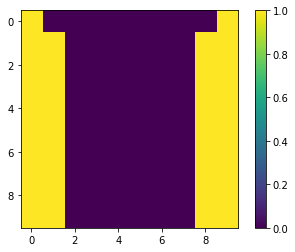

In [6]:
plt.imshow(M)
plt.colorbar()
plt.show()

In [7]:
eig_vecs, _ = qr(M, mode='economic')
eig_vals = rand(M.shape[0])  # 0< <1

## Finite DPP

In [8]:
DPP = FiniteDPP('correlation',
                **{'K': (eig_vecs*eig_vals).dot(eig_vecs.T)})

## Subsampling

In [9]:
#Flush previous samples
DPP.flush_samples()

# Sample and take flatten lists of lists
for _ in range(10):
    DPP.sample_exact()

samples_ = DPP.list_of_samples
samples__ = list()
for l in samples_:
    samples__.extend(l)
    
print(samples__)

[4, 0, 7, 5, 2, 3, 6, 1, 6, 7, 1, 5, 0, 3, 6, 7, 6, 7, 1, 2, 4, 1, 7, 6, 9, 6, 9, 2, 5, 1, 7, 4, 7, 6, 4, 9, 3, 9, 2, 7, 6, 4, 6, 7, 4, 1, 9, 2, 4, 1, 6, 7]


In [16]:
samples_freq_counter = Counter(samples__)
mc = samples_freq_counter.most_common(rank_)
indices = [ k for k, v in mc ]
print(indices)

[7, 6]


In [17]:
N = copy.deepcopy(M)

for i in range(10):
    if i not in indices:
        N[i] = np.zeros(M.shape[0])

## Plot subsamples

DPP selected 2 rows that are exactly identical! Am I doing something wrong?

Also, I was expecting the first data point to always be included in the subsample to increase diversity.

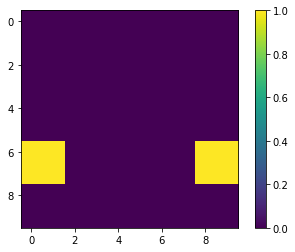

In [19]:
plt.imshow(N)
plt.colorbar()
plt.show()

## What I was expecting

In [22]:
expected_datapoints = [0, 3]
O = copy.deepcopy(M)

for i in range(10):
    if i not in expected_datapoints:
        O[i] = np.zeros(M.shape[0])

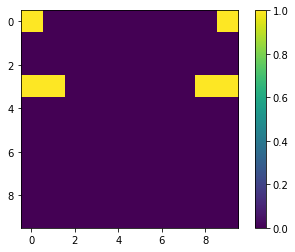

In [23]:
plt.imshow(O)
plt.colorbar()
plt.show()